<h1 style="text-align:center;"><span style="color:#011f4b; font-size:20px; "> WELCOME TO YOUR FINAL EXAM TASK </span></h1>

<span style="color:#011f4b; font-size:15px; "> You have 150 minutes to complete this task. So, please, make this time useful </span>

<span style="color:#011f4b; font-size:15px; "><b>Pay attention to the file name - your file should be named as "FE_LName_FName_group" .</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied. 
</span>

<span style="color:#011f4b; font-size:15px; "> You have <b>3 tasks</b> </span>

<span style="color:#011f4b; font-size:15px; ">  <br/>
    Dataset Description:<br/>
* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( Low - High )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )
</span>

<span style="color:#011f4b; font-size:15px; ">  You have <b>3 main tasks</b><br/>
    1. To perform EDA
    2. To train the Linear Regression Model (RMSE)
    3. To apply Regulirization on your model

<span style="color:#011f4b; font-size:15px; ">
    <b>Your Score decomposition:</b>
    <li>EDA - 40 %</li>
     <li>Linear Regression - 30%</li>
    <li> Regulirization - 15%</li>
 <li>The organization(comments, markdowns etc.) of your notebook - 15%</li>
 </span>

## Import packages

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from scipy.stats import iqr
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

<hr>
<h2>Read CSV file (head,describe,tail)</h2>

In [97]:
df = pd.read_csv('Admission_prediction.csv')

In [98]:
df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1.0,337.0,118.0,4.0,NaN,4.5,9.65,1,0.92
1,1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,4,5.0,314.0,103.0,2.0,NaN,3.0,8.21,0,0.65


In [356]:
df.tail()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,495,NaN,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,497,498.0,330.0,NaN,5.0,NaN,5.0,9.56,1,0.93
498,498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,499,500.0,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


## The largest number of NaNs SOP, TOEFL Score, Univer Rating

In [355]:
df.isnull().sum()

Unnamed: 0            0
Serial No.            9
GRE Score             7
TOEFL Score          80
University Rating    82
SOP                  83
LOR                   4
CGPA                 13
Research              0
Chance of Admit       0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,491.000000,493.000000,420.000000,418.000000,417.000000,496.000000,487.000000,500.000000,500.00000
mean,249.500000,249.270876,316.375254,107.126190,3.122010,3.362110,3.483871,8.568932,0.560000,0.72174
std,144.481833,144.736714,11.212252,6.023485,1.142988,0.977907,0.925367,0.606402,0.496884,0.14114
min,0.000000,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.34000
25%,124.750000,124.500000,308.000000,103.000000,2.000000,2.500000,3.000000,8.120000,0.000000,0.63000
50%,249.500000,248.000000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.72000
75%,374.250000,375.500000,325.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.82000
max,499.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.97000


In [6]:
df.shape

(500, 10)

## EDA (Explorary Data Analysis) 

### 1. Drop NANs

In [9]:
df = df.dropna(how='any')

In [11]:
df.shape # Как видите кол-во ров уменьшилос при удалении NaNs

(273, 10)

In [13]:
## Delete outliers

### q1 -> quantile with 25%
### q3 -> quantile with 75%

In [290]:
def remove_outlier(df_in, col_name):
    quantile1 = df_in[col_name].quantile(0.25) # 25%
    quantile3 = df_in[col_name].quantile(0.75) # 75%
    iqr = quantile3-quantile1 #Interquartile диапазон
    fence_low  = quantile1-1.5*iqr
    fence_high = quantile3+1.5*iqr
    df_without_outlier = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)] # IQA Method
    return df_without_outlier

In [291]:
new_df1 = remove_outlier(df, 'CGPA')

In [292]:
new_df2 = remove_outlier(new_df1, 'TOEFL Score')

###  I chose the CGPA and TOEFLA Score columns, because they are many numbers where there are outliers

In [302]:
new_df2 = new_df2.dropna(how = 'any')
new_df2

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
5,5,6.0,330.0,115.0,5.0,4.5,3.0,9.34,1,0.90
7,7,8.0,308.0,101.0,2.0,3.0,4.0,7.90,0,0.68
...,...,...,...,...,...,...,...,...,...,...
493,493,494.0,300.0,95.0,2.0,3.0,1.5,8.22,1,0.62
494,494,495.0,301.0,99.0,3.0,2.5,2.0,8.45,1,0.68
496,496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
498,498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


### Graphics

## I built a scatter plot between CGPA and TOEFL SCORE, we can say that in this graph all are linearly dependent +/-

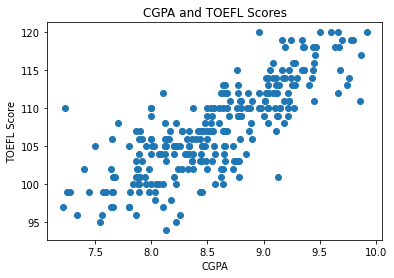

In [303]:
plt.scatter(new_df2['CGPA'], new_df2['TOEFL Score'])
plt.title('CGPA and TOEFL Scores')
plt.ylabel('TOEFL Score')
plt.xlabel('CGPA')
plt.show()

## In this part I wrote a bar chart and it can be deduced that most students get more than 105 points on the TOEFL Score

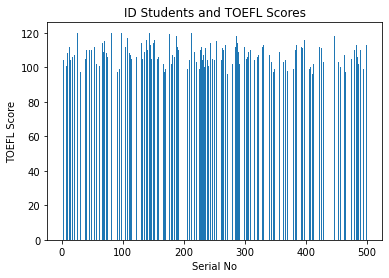

In [304]:
plt.bar(new_df2['Serial No.'], new_df2['TOEFL Score'])
plt.title('ID Students and TOEFL Scores')
plt.ylabel('TOEFL Score')
plt.xlabel('Serial No')
plt.show()

## In this scatter X -> CGPA Y-> GRE Score. There are no choices, on average CGPA is 320 points at 8.5 GRE Score

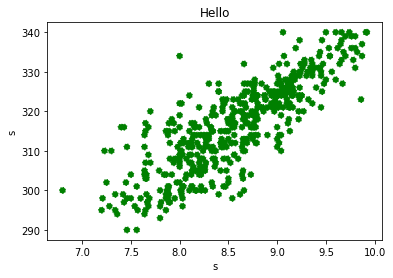

In [305]:
plt.scatter(df['CGPA'], df['GRE Score'], color = 'green', marker = 'o', linestyle = 'dotted')
plt.title('Hello')
plt.ylabel('s')
plt.xlabel('s')
plt.show()

<hr>

# Linear Regression and Regulirization parts (RMSE)

### Since everything is numerical here and we don’t need to do Categorical Data Encoding

# Construct a linear regression as Y - target, we will have a TOEFL Score, according to X -> target University Rating, SOP, CGPA

In [400]:
new_df3 = clean_dataset(new_df2)

In [366]:
model = LinearRegression()

In [425]:
X = pd.DataFrame(new_df3, columns = ['Research', 'CGPA', 'University Rating']) 
X

,Research,CGPA,University Rating
1,1.0,8.87,4.0
2,1.0,8.00,3.0
3,1.0,8.67,3.0
5,1.0,9.34,5.0
7,0.0,7.90,2.0
...,...,...,...
493,1.0,8.22,2.0
494,1.0,8.45,3.0
496,1.0,9.87,5.0
498,0.0,8.43,4.0


In [424]:
y = new_df3['TOEFL Score']
y 

1      107.0
2      104.0
3      110.0
5      115.0
7      101.0
       ...  
493     95.0
494     99.0
496    117.0
498    103.0
499    113.0
Name: TOEFL Score, Length: 273, dtype: float64

### X and Y target values ​​are ready

In [426]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Our model has 65% accuracy

In [370]:
model.score(X, y)

0.6544501126339435

### With 4 points for SOP and 9.3 points for CGPA and if the university has a rating of 4.3. Students can get a TOEFL 113 mark with 35% margin of error

In [371]:
model.predict([[4, 9.3, 4.3]])

array([113.01157214])

### At 3.5 points for SOP and 9 points for CGPA and if the university has a rating of 4.7. Students can get a TOEFL 110 grade with 35% margin of error

In [372]:
model.predict([[3.5, 9, 4.7]])

array([110.70934186])

# Improve the model and Regulirization using K-Fold Cross Validation and RMSE ( RMSE в конце части)

In [373]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [374]:
x_cross_val = pd.DataFrame(new_df2, columns = ['SOP', 'CGPA', 'University Rating']) 

In [375]:
x_cross_val

,SOP,CGPA,University Rating
1,4.0,8.87,4.0
2,3.0,8.00,3.0
3,3.5,8.67,3.0
5,4.5,9.34,5.0
7,3.0,7.90,2.0
...,...,...,...
493,3.0,8.22,2.0
494,2.5,8.45,3.0
496,5.0,9.87,5.0
498,4.0,8.43,4.0


In [376]:
y_cross_val = new_df3['TOEFL Score']

# Divide our model into train and test for cross validation

In [377]:
X_train, X_test, y_train, y_test = train_test_split(x_cross_val, y_cross_val, test_size = 0.2)

## X_train took 80% of the data, and X_test took 20% of the data. y_train 80%, y_test 20%. All data were taken randomly for linear regression.

In [378]:
X_train.head()

,SOP,CGPA,University Rating
83,4.0,9.36,5.0
474,3.0,7.95,4.0
318,2.5,8.80,3.0
30,3.0,8.10,2.0
184,2.5,8.32,2.0


In [379]:
X_train.shape # 80%

(218, 3)

In [380]:
X_test.head()

,SOP,CGPA,University Rating
392,4.0,9.12,4.0
455,1.5,7.64,2.0
363,2.5,8.36,2.0
143,4.5,9.92,4.0
490,2.5,8.12,2.0


In [381]:
X_test.shape # 20%

(55, 3)

In [382]:
y_train.head()

83     115.0
474    105.0
318    111.0
30      97.0
184    106.0
Name: TOEFL Score, dtype: float64

In [383]:
y_train.shape # 80%

(218,)

In [384]:
y_test.head()

392    112.0
455    102.0
363    103.0
143    120.0
490    105.0
Name: TOEFL Score, dtype: float64

In [385]:
y_test.shape # 20%

(55,)

In [386]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# As you can see, our model has improved by almost 10% with a regular model

In [387]:
lr.score(X_test, y_test)

0.7902724668231825

### Import KFOLD Cross Validation

In [388]:
from sklearn.model_selection import KFold

In [389]:
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

#  We make 3 splits where we train a model of 90 data.

In [390]:
for train_index, test_index in kf.split(new_df2):
    print(train_index, test_index)

[ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 8

In [391]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [392]:
get_score(lr, X_train, X_test, y_train, y_test)

0.7902724668231825

In [393]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [394]:
cross_val_score(lr, x_cross_val, y_cross_val)

array([0.61718688, 0.64288704, 0.69297082, 0.71680579, 0.4002652 ])

In [395]:
cross_val_predict(lr, x_cross_val, y_cross_val, cv=10)

array([109.80493053, 102.6639147 , 107.80619741, 113.78507314,
       101.6244887 , 107.29249866, 111.49279788, 103.11481822,
       104.35707719, 103.11481822, 108.98566115, 106.55864329,
       101.93005933, 116.65240422, 116.93535607, 115.69309709,
       109.82225416, 103.09219944, 105.74466905,  99.68325567,
        98.38349661, 100.60768149, 102.88936646, 103.60060305,
       105.80216914, 114.22538636, 112.24927202, 113.26607924,
       109.19498413, 104.65047067, 102.94776045,  97.99905841,
       100.85280163, 103.98895761, 103.44984489, 105.15255511,
       104.13582173, 107.74959837, 109.94472428, 107.57054034,
       111.73309846, 112.33824573, 116.23124748, 114.92789147,
       111.51507351, 109.12155207,  99.60837455, 102.25211485,
       115.08698749, 113.35014473, 113.47767134, 108.9083615 ,
       103.04792753, 102.28112111,  99.78259821, 100.78482846,
       102.55441224, 109.94761997, 112.83580562, 106.40342141,
       110.31219057, 112.20662134, 113.59826579, 107.44

# Compare two models (before fit and after fit)

### get_score 73% after K-fold Cross Validation

In [396]:
get_score(lr, X_train, X_test, y_train, y_test)

0.7902724668231825

### model without fit has 65%

In [427]:
model.score(X, y)

0.6604527285269131

# Make prediction using RMSE

In [398]:
y_pred = lr.predict(X_test)

In [399]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.851086201582445


# Summary

## In the end, I want to write that, the model has no categorical data and has a large number of nans. There are almost no election. With a small number of columns, I could parse the data well. As I wrote earlier, I improved the model by almost 13% using cross-validation.